In [174]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error
# Import label encoder
from sklearn import preprocessing
from sklearn import *

In [175]:
#Reading the dataset
student_data = pd.read_csv("/content/student-por.csv")

In [176]:
#Determining the the size of dataset 
student_data.shape

(649, 33)

In [177]:
#overviewing the dataset extracted
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [178]:
# Verifying the factor of null value in dataset
student_data.isnull().sum()



school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [179]:
#Gives the approxiamtion of columns that can be used for training the model and statistical analysis
student_data.describe() 

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


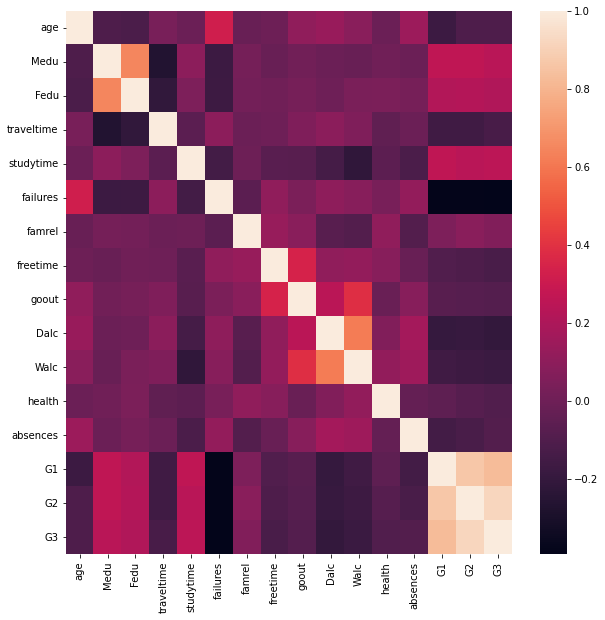

In [180]:
# Corelation plot for distinguish between two columns dependency
plt.figure(figsize=(10, 10))
sns.heatmap(student_data.corr())

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


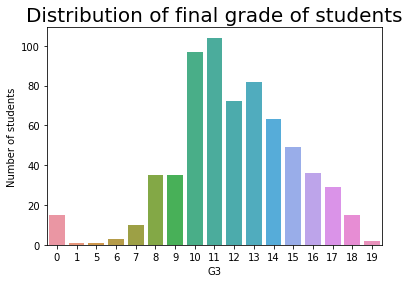

In [181]:
b = sns.countplot(student_data['G3'])
b.axes.set_title('Distribution of final grade of students',fontsize=20)
b.set_xlabel('G3')
b.set_ylabel('Number of students')
plt.show()

Text(0.5, 1.0, 'Scatter plot of student Studytime and G1')

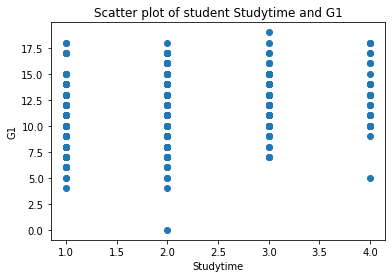

In [182]:
plt.scatter(x=student_data.studytime , y = student_data.G1)
plt.xlabel("Studytime")
plt.ylabel("G1")
plt.title("Scatter plot of student Studytime and G1")

Text(0.5, 1.0, 'Scatter plot of student Studytime and G2')

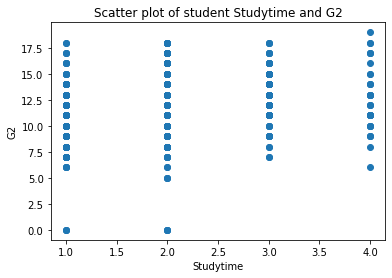

In [183]:
plt.scatter(x=student_data.studytime , y = student_data.G2)
plt.xlabel("Studytime")
plt.ylabel("G2")
plt.title("Scatter plot of student Studytime and G2")

Text(0.5, 1.0, 'Scatter plot of student Studytime and G3')

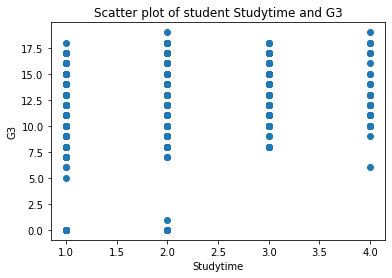

In [184]:
plt.scatter(x=student_data.studytime , y = student_data.G3)
plt.xlabel("Studytime")
plt.ylabel("G3")
plt.title("Scatter plot of student Studytime and G3")

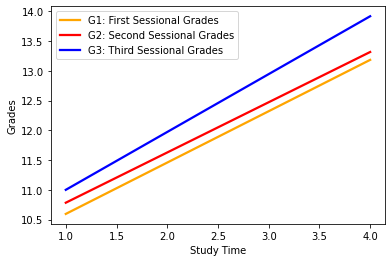

In [185]:
# Plotting all sessional grades for comparison

sns.regplot(x="studytime", y="G1", data=student_data, color="orange",scatter= False, ci= None, label="G1: First Sessional Grades")
sns.regplot(x="studytime", y="G2", data=student_data, color="red",scatter= False, ci= None, label="G2: Second Sessional Grades")
sns.regplot(x="studytime", y="G3", data=student_data, color="blue",scatter= False, ci= None, label="G3: Third Sessional Grades")

plt.xlabel("Study Time")
plt.ylabel("Grades")

plt.legend(loc="upper left")
plt.show()

In [186]:
# Taking average of G1, G2 and G3 for total result of one year
Average_of_G1_G2_G3 = student_data[['G1', 'G2', 'G3']].mean(axis=1)

# Printing the average of G1, G2 and G3 as a series
print(Average_of_G1_G2_G3)

0       7.333333
1      10.333333
2      12.333333
3      14.000000
4      12.333333
         ...    
644    10.333333
645    15.333333
646    10.666667
647    10.000000
648    10.666667
Length: 649, dtype: float64


In [187]:
# Now adding the average series next to G1, G2 and G3 columns
student_data["Average_of_G1_G2_G3"] = Average_of_G1_G2_G3

# Determinig the new data set
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Average_of_G1_G2_G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,7.333333
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,10.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,12.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,14.000000
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,12.333333


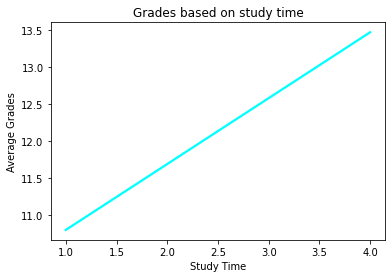

In [188]:
# On the basis of absences determining G3

plt.title("Grades based on study time")
sns.regplot(x="studytime", y="Average_of_G1_G2_G3", data=student_data, color="cyan",scatter= False, ci= None)

plt.xlabel("Study Time")
plt.ylabel("Average Grades")

plt.show()

In [189]:
# Shuffling for unbiased training and testing of dataset
student_data = student_data.sample(frac = 1)

# Checking whether dataset is shuffled or not
student_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Average_of_G1_G2_G3
403,GP,F,17,U,GT3,T,2,1,services,other,...,3,4,2,2,1,10,12,15,15,14.000000
288,GP,F,18,U,LE3,A,2,1,other,other,...,3,4,1,3,5,2,12,12,13,12.333333
413,GP,M,21,R,LE3,T,1,1,at_home,other,...,3,3,5,2,4,21,9,10,10,9.666667
61,GP,F,16,U,GT3,T,1,1,services,services,...,5,5,5,5,5,0,10,10,16,12.000000
123,GP,M,16,U,GT3,T,4,4,health,other,...,4,4,1,4,5,4,12,13,13,12.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,GP,F,17,U,GT3,T,4,4,teacher,services,...,3,1,1,4,5,2,11,11,12,11.333333
533,MS,F,16,U,LE3,T,2,1,other,services,...,2,2,1,1,3,0,14,15,16,15.000000
221,GP,F,16,U,GT3,T,4,3,teacher,other,...,3,2,1,1,1,4,14,15,15,14.666667
56,GP,F,15,U,GT3,A,4,3,services,services,...,3,2,1,1,1,0,15,14,15,14.666667


In [190]:
# Predict Variable(X) and Target Variable(y)
X = student_data.drop("Average_of_G1_G2_G3", axis = "columns")
y = student_data["Average_of_G1_G2_G3"]

# Dividing the dataset into test and train module
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [191]:
# Making the Linear Model
model = LinearRegression()

# Training Model
model.fit(X_train.values.reshape(-1, 1) , y_train)

ValueError: ignored

In [192]:
# As we observed the error in above compilation, so using encoder as tool to fix the issue
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column which have dtype of object.
for column in student_data:
    if student_data[column].dtype == object:
        student_data[column]= label_encoder.fit_transform(student_data[column])

In [193]:
# Retrtying the feeding of data
# Predict Variable(X) and Target Variable(y)
X = student_data.drop(columns=["Average_of_G1_G2_G3", "G1", "G2", "G3"])
y = student_data["Average_of_G1_G2_G3"]

# Dividing the dataset into test and train module
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [194]:
# Making the Linear Model
model = LinearRegression()

# Training Model
model.fit(X_train, y_train)

LinearRegression()

In [195]:
# Your Model is trained
# Now, we'll predict some values from test split and compare it with actual values
predict_values = model.predict(X_test)

# Checking the series of predicted values 
predict_values[:10]

array([12.24048215, 11.879376  , 13.61627194,  9.4636336 , 12.11439953,
       11.02989174, 14.26852483, 10.92507103,  8.98351169, 10.59334292])

In [196]:
# Comparing the Predicted and Actual values
model_compare = pd.DataFrame({
    "Average_of_G1_G2_G3" : y_test, "Predicted values of Average_of_G1_G2_G3" : predict_values
})
# Checking the values
model_compare.head()

,Average_of_G1_G2_G3,Predicted values of Average_of_G1_G2_G3
280,9.666667,12.240482
45,10.666667,11.879376
395,12.333333,13.616272
639,4.333333,9.463634
542,11.000000,12.114400


In [197]:
# accuracy = model.score(predict_values, y_test)

# print('Accuracy:', accuracy)


In [201]:
r2_score(predict_values, y_test)*-1

1.1395298221543424

In [199]:
mean_squared_error(predict_values, y_test)

6.6009928027219225